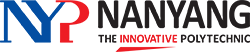

# IT3311 Assignment - Task 1: Text Classification

You are required to build a text classification model to predict the video category based on its title and transcript.

**Tasks:**

1. **Data Understanding**: Examine the dataset
2. **Data Preparation**: Prepares the data and all necessary preprocessing tasks
3. **Modelling**: Use different text representation and algorithms
4. **Evaluation**: Evaluates results from the algorithms and select the best model

**Done by: Yap Suen Hong (200562J)**

## Import libraries and download the packages

In [33]:
import pandas as pd
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Enter code here
import numpy as np
import matplotlib.pyplot as plt
import nltk
import string

# Enter code here
import pandas as pd

nltk.download('averaged_perceptron_tagger')

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 
stop_words = set(stopwords.words('english'))

from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.stem.wordnet import WordNetLemmatizer

import gensim
from gensim import corpora

import string
from pathlib import Path
from pprint import pprint

import re
from gensim.parsing.porter import PorterStemmer
porter_stemmer = PorterStemmer()

from nltk.probability import FreqDist
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import cohen_kappa_score

from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import multilabel_confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Read the dataset

In [2]:
# Read in food_reviews.csv and display the first 5 lines of the data
df = pd.read_csv("videodata.csv", index_col=0)
#Print out data frame
df.head()

,Id,Channel,Title,Category,Transcript
1,RN8yoi-e2yc,Mythical Kitchen,$420 Pizza Hut Stuffed Crust Pizza | Fancy Fas...,Food,"- Oh, that's dirty.\r\n- Wow! - Whoa.\r\n- You..."
2,IugcIAAZJ2M,Munchies,The Iconic $1 Pizza Slice of NYC | Street Food...,Food,if you want good pizza come to st marks it's t...
3,JiEO6F8i0eU,Parks and Recreation,Ron Swanson: The Papa of Pawnee | Parks and Re...,"Entertainment,Comedy",April where have you been over two phone calls...
5,0ZWGeidvrJw,Doctor Who,The Doctor Defeats the Abzorbaloff | Love and ...,Entertainment,"Oh, what's the matter?\r\nHave you given up so..."
6,YiEj9mrqTN0,A&E,Live PD: Most Viewed Moments from Walton Count...,News,[music playing] We'll be on Laverne Street. It...


## Data Understanding
Perform the necessary steps and explain the rationale taken here.



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1589 entries, 1 to 2514
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Id          1589 non-null   object
 1   Channel     1589 non-null   object
 2   Title       1589 non-null   object
 3   Category    1589 non-null   object
 4   Transcript  1589 non-null   object
dtypes: object(5)
memory usage: 74.5+ KB


In [4]:
df.shape

(1589, 5)

This step is to check for any duplicates datas to remove

In [5]:
df['Transcript'].duplicated().sum()

0

In [6]:
df['Title'].duplicated().sum()

1

In [7]:
df.duplicated().sum()

0

This step is to check for any null value in the dataset

In [8]:
df.isnull().sum()

Id            0
Channel       0
Title         0
Category      0
Transcript    0
dtype: int64

In [9]:
for index,text in enumerate(df['Transcript'][40:45]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 "Stretching before you
is the Makgadikgadi. These are the biggest salt flats
in the world, almost completely lifeless
and as wide as Portugal. No car has ever driven across them. If you run out of water you will die. If your car breaks down
and you can't be rescued, you will die. If you run out of food, you will die. It's like driving on a crème brûlée. There's a primeval ooze
covered with a thin layer of salty crust. If you have thin tyres,
you will break through that crust, get stuck and you will die."
So it advises: "To fit fat tyres and remove as much
weight as possible before setting off." Well, how hard can it be? Don't say that! In camp, the weight-shedding began. Ready? That doesn't work. Thanks awfully. Wow, feel how much this seat weighs. Like your work. Fuel filler, I'll need that, maybe. I don't want to take the hub caps off,
really, 'cause they protect the... hubs. -Can I point something out?
-What? Hammond's walking around his car,
muttering about how he needs 

In [10]:
for index,text in enumerate(df['Transcript'][0:1]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 - Oh, that's dirty.
- Wow! - Whoa.
- You're a dirty girl. (upbeat music) - Hey man. - What'd you get, man? How'd you get in my car? - Uh, well, we started in here. So, this is Pizza Hut,
Stuffed Crust pizza. This is what we're gonna make fancy. Look at that, it's ooey gooey...
- Yeah, I was gonna ask, why is it called Stuffed Crust? - So they stuffed the crust
with cheese, giving you an incentive to eat the
crust because a lot of people throw the crust away. - So, do I bite it first? - Yeah, yeah. You gotta go from the back. (music) - All right. So, right off the bat, it
tastes a lot like the cheese on the pizza. - It is the cheese on the pizza. - But, slow down 'cause it's in the pizza. - It is also in the pizza. But now you gotta grab, while
it's still in your mouth, you gotta grab another bite. - So, Josh, this isn't fast
food, you went and ordered it, you didn't drive through. - We're eating a pizza, in my car, that each of us are
paying less than $7 for, and it's gonna 

In [11]:
for index,text in enumerate(df['Title'][40:45]):
  print('Title %d:\n'%(index+1),text)

Title 1:
 Botswana Adventure Part 1 - Top Gear - BBC
Title 2:
 Inside a captured Islamic State suicide vehicle
Title 3:
 Introducing The Squad | Brooklyn Nine-Nine
Title 4:
 Build a responsive website with HTML & CSS - Part 1 [Live Coding]
Title 5:
 BROKE vs PRO Gaming Setup


I count how many values they are in each category and as you can see some datas have more than 1 category so I have to split it. 

In [12]:
df_category = df.groupby(['Category'])['Category'].count()
print(df_category)

Category
Comedy                  227
Comedy,Entertainment     88
Entertainment           114
Entertainment,Comedy     88
Food                    281
Food,Entertainment       28
News                    218
Tech                    222
Tech,Comedy              29
Tech,News                29
VideoGames              265
Name: Category, dtype: int64


## Data Preparation
Perform the necessary steps and explain the rationale taken here.



Before i start off my data prep, i will first split the category column

In [13]:
reshaped_DF = \
(df.set_index(df.columns.drop('Category',1).tolist())
   .Category.str.split(',', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'Category'})
   .loc[:, df.columns]
)

reshaped_DF.head()

,Id,Channel,Title,Category,Transcript
0,RN8yoi-e2yc,Mythical Kitchen,$420 Pizza Hut Stuffed Crust Pizza | Fancy Fas...,Food,"- Oh, that's dirty.\r\n- Wow! - Whoa.\r\n- You..."
1,IugcIAAZJ2M,Munchies,The Iconic $1 Pizza Slice of NYC | Street Food...,Food,if you want good pizza come to st marks it's t...
2,JiEO6F8i0eU,Parks and Recreation,Ron Swanson: The Papa of Pawnee | Parks and Re...,Entertainment,April where have you been over two phone calls...
3,JiEO6F8i0eU,Parks and Recreation,Ron Swanson: The Papa of Pawnee | Parks and Re...,Comedy,April where have you been over two phone calls...
4,0ZWGeidvrJw,Doctor Who,The Doctor Defeats the Abzorbaloff | Love and ...,Entertainment,"Oh, what's the matter?\r\nHave you given up so..."


### Data Prep For Transcript Column

I have to do case normalization as I want to expand contractions, without doing case normalization some words wont be read as contraction as some of them are caps 

In [14]:
reshaped_DF['Transcript']=reshaped_DF['Transcript'].apply(lambda x: x.lower())

Next, I notice the datas have contractions like I'll or I'm therefore i will expand it. 

In [15]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have", "what'd": "what did"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
reshaped_DF['Transcript']=reshaped_DF['Transcript'].apply(lambda x:expand_contractions(x))

This step will remove any excess space I have in the sentence

In [16]:
reshaped_DF['Transcript']=reshaped_DF['Transcript'].apply(lambda x: re.sub(' +',' ',x))

After removing excess space, I will remove stowords, number, punctuation and stem the words to root word and do tokenization

In [17]:
def clean(doc):
    all_words_clean = []
    for word in doc:
        # remove stopwords and number
        if word not in stop_words:
            # remove punctuation
            punc_free = ''.join([ch for ch in word if ch not in string.punctuation])
            if len(punc_free)>=2 and not punc_free.isdigit():
                # stem word to root word
                all_words_clean.append(porter_stemmer.stem(punc_free))

    return all_words_clean

In [18]:
reshaped_DF['Transcript'] = reshaped_DF['Transcript'].apply(lambda x: word_tokenize(x))
reshaped_DF['Transcript'] = reshaped_DF['Transcript'].apply(lambda x: clean(x))  
reshaped_DF.head()

,Id,Channel,Title,Category,Transcript
0,RN8yoi-e2yc,Mythical Kitchen,$420 Pizza Hut Stuffed Crust Pizza | Fancy Fas...,Food,"[oh, dirti, wow, whoa, dirti, girl, upbeat, mu..."
1,IugcIAAZJ2M,Munchies,The Iconic $1 Pizza Slice of NYC | Street Food...,Food,"[want, good, pizza, come, st, mark, best, pizz..."
2,JiEO6F8i0eU,Parks and Recreation,Ron Swanson: The Papa of Pawnee | Parks and Re...,Entertainment,"[april, two, phone, call, came, uninvit, rais,..."
3,JiEO6F8i0eU,Parks and Recreation,Ron Swanson: The Papa of Pawnee | Parks and Re...,Comedy,"[april, two, phone, call, came, uninvit, rais,..."
4,0ZWGeidvrJw,Doctor Who,The Doctor Defeats the Abzorbaloff | Love and ...,Entertainment,"[oh, matter, given, soon, point, would, go, ev..."


Now I am done with data prep for transcript column, I will move on to the Title column 

### Data Prep For Title Column

In [19]:
reshaped_DF['Title']=reshaped_DF['Title'].apply(lambda x:expand_contractions(x))
reshaped_DF['Title'] = reshaped_DF['Title'].apply(lambda x: word_tokenize(x.lower()))
reshaped_DF['Title'] = reshaped_DF['Title'].apply(lambda x: clean(x))  
reshaped_DF.head()

,Id,Channel,Title,Category,Transcript
0,RN8yoi-e2yc,Mythical Kitchen,"[pizza, hut, stuf, crust, pizza, fanci, fast, ...",Food,"[oh, dirti, wow, whoa, dirti, girl, upbeat, mu..."
1,IugcIAAZJ2M,Munchies,"[icon, pizza, slice, nyc, street, food, icon]",Food,"[want, good, pizza, come, st, mark, best, pizz..."
2,JiEO6F8i0eU,Parks and Recreation,"[ron, swanson, papa, pawne, park, recreat]",Entertainment,"[april, two, phone, call, came, uninvit, rais,..."
3,JiEO6F8i0eU,Parks and Recreation,"[ron, swanson, papa, pawne, park, recreat]",Comedy,"[april, two, phone, call, came, uninvit, rais,..."
4,0ZWGeidvrJw,Doctor Who,"[doctor, defeat, abzorbaloff, love, monster, d...",Entertainment,"[oh, matter, given, soon, point, would, go, ev..."


In [20]:
for index,text in enumerate(reshaped_DF['Title'][40:45]):
  print('Title %d:\n'%(index+1),text)

Title 1:
 ['window', 'real']
Title 2:
 ['build', 'ultim', 'xbox']
Title 3:
 ['celebr', 'imperson', 'celebr', 'graham', 'norton', 'show']
Title 4:
 ['celebr', 'imperson', 'celebr', 'graham', 'norton', 'show']
Title 5:
 ['battlefield', 'best', 'gun', 'class']


### Data Prep For Category Column

Since the column is only category the only data prep I will be doing is Case Normalization

In [21]:
reshaped_DF['Category_Cleaned']=reshaped_DF['Category'].apply(lambda x: x.lower())

In [22]:
reshaped_DF.head()

,Id,Channel,Title,Category,Transcript,Category_Cleaned
0,RN8yoi-e2yc,Mythical Kitchen,"[pizza, hut, stuf, crust, pizza, fanci, fast, ...",Food,"[oh, dirti, wow, whoa, dirti, girl, upbeat, mu...",food
1,IugcIAAZJ2M,Munchies,"[icon, pizza, slice, nyc, street, food, icon]",Food,"[want, good, pizza, come, st, mark, best, pizz...",food
2,JiEO6F8i0eU,Parks and Recreation,"[ron, swanson, papa, pawne, park, recreat]",Entertainment,"[april, two, phone, call, came, uninvit, rais,...",entertainment
3,JiEO6F8i0eU,Parks and Recreation,"[ron, swanson, papa, pawne, park, recreat]",Comedy,"[april, two, phone, call, came, uninvit, rais,...",comedy
4,0ZWGeidvrJw,Doctor Who,"[doctor, defeat, abzorbaloff, love, monster, d...",Entertainment,"[oh, matter, given, soon, point, would, go, ev...",entertainment


## Modelling
Perform the necessary steps and explain the rationale taken here.



In [23]:
reshaped_DF['Transcript_Cleaned'] = reshaped_DF['Transcript'].apply(lambda x: " ".join(x))  
reshaped_DF['Title_Cleaned'] = reshaped_DF['Title'].apply(lambda x: " ".join(x))  

In [24]:
reshaped_DF.head()

,Id,Channel,Title,Category,Transcript,Category_Cleaned,Transcript_Cleaned,Title_Cleaned
0,RN8yoi-e2yc,Mythical Kitchen,"[pizza, hut, stuf, crust, pizza, fanci, fast, ...",Food,"[oh, dirti, wow, whoa, dirti, girl, upbeat, mu...",food,oh dirti wow whoa dirti girl upbeat music hei ...,pizza hut stuf crust pizza fanci fast food myt...
1,IugcIAAZJ2M,Munchies,"[icon, pizza, slice, nyc, street, food, icon]",Food,"[want, good, pizza, come, st, mark, best, pizz...",food,want good pizza come st mark best pizza ll bor...,icon pizza slice nyc street food icon
2,JiEO6F8i0eU,Parks and Recreation,"[ron, swanson, papa, pawne, park, recreat]",Entertainment,"[april, two, phone, call, came, uninvit, rais,...",entertainment,april two phone call came uninvit rais monei c...,ron swanson papa pawne park recreat
3,JiEO6F8i0eU,Parks and Recreation,"[ron, swanson, papa, pawne, park, recreat]",Comedy,"[april, two, phone, call, came, uninvit, rais,...",comedy,april two phone call came uninvit rais monei c...,ron swanson papa pawne park recreat
4,0ZWGeidvrJw,Doctor Who,"[doctor, defeat, abzorbaloff, love, monster, d...",Entertainment,"[oh, matter, given, soon, point, would, go, ev...",entertainment,oh matter given soon point would go everyth ev...,doctor defeat abzorbaloff love monster doctor


## Generate Vector Space Model using TF-IDF

In [25]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion, Pipeline

#putting 2 columns together to do tf-idf 
df_all = reshaped_DF[reshaped_DF.columns[6:8]]

transformer = FeatureUnion([
                ('transcript_cleaned_tfidf', 
                  Pipeline([('extract_field',
                              FunctionTransformer(lambda x: x['Transcript_Cleaned'], 
                                                  validate=False)),
                            ('tfidf', 
                              TfidfVectorizer())])),
                ('title_cleaned_tfidf', 
                  Pipeline([('extract_field', 
                              FunctionTransformer(lambda x: x['Title_Cleaned'], 
                                                  validate=False)),
                            ('tfidf', 
                              TfidfVectorizer())]))]) 

transformer.fit(df_all)

Transcript_vocab = transformer.transformer_list[0][1].steps[1][1].get_feature_names() 
Title_vocab = transformer.transformer_list[1][1].steps[1][1].get_feature_names()
vocab = Transcript_vocab + Title_vocab

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [26]:
tfidf_features = pd.DataFrame(transformer.transform(df_all).toarray(),index=df_all.index,columns=vocab)

tfidf_features.head()

,0300am,0600am,07earli,07g,0900pm,0d093,0d09328,0l,0x,10,...,youtub,ytp,zelda,zetajon,zonda,zondai,zone,zoo,zoom,zygon
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
vectorizer = TfidfVectorizer(min_df = 1, stop_words = 'english')
Category_dtm = vectorizer.fit_transform(reshaped_DF['Category_Cleaned'])

Category_tfidf_features = pd.DataFrame(Category_dtm.toarray(),index=reshaped_DF.index,columns=vectorizer.get_feature_names())
Category_tfidf_features.head()


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,comedy,entertainment,food,news,tech,videogames
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0


In [28]:
X = tfidf_features
y = Category_tfidf_features

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [43]:
acc_list = []
auroc_list =[]
log_list=[]

### No1. Decision Tree

In [30]:
tr = DecisionTreeClassifier(random_state=42)
tr.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [31]:
tr.get_depth()

59

In [32]:
target_names = ['comedy', 'entertainment', 'food', 'news', 'tech', 'videogames']

In [34]:
print("Decison Tree:")
print('Confusion Matrix')
print(multilabel_confusion_matrix(y_test, tr.predict(X_test)))
print('')

print("Classification Report")
print(classification_report(y_test, tr.predict(X_test), target_names=target_names))

Decison Tree:
Confusion Matrix
[[[235  49]
  [ 70  17]]

 [[259  48]
  [ 52  12]]

 [[291  18]
  [ 18  44]]

 [[303  19]
  [ 18  31]]

 [[296  19]
  [ 17  39]]

 [[306  12]
  [ 18  35]]]

Classification Report
               precision    recall  f1-score   support

       comedy       0.26      0.20      0.22        87
entertainment       0.20      0.19      0.19        64
         food       0.71      0.71      0.71        62
         news       0.62      0.63      0.63        49
         tech       0.67      0.70      0.68        56
   videogames       0.74      0.66      0.70        53

    micro avg       0.52      0.48      0.50       371
    macro avg       0.53      0.51      0.52       371
 weighted avg       0.50      0.48      0.49       371
  samples avg       0.48      0.48      0.48       371



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
y_pred = tr.predict(X_test)

In [44]:
tr_acc = accuracy_score(y_test, y_pred)
tr_roc = roc_auc_score(y_test, y_pred, average="weighted", multi_class="ovr")
tr_log = log_loss(y_test, y_pred)

acc_list.append(tr_acc)
auroc_list.append(tr_roc)
log_list.append(tr_log)

In [36]:
for category in target_names:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    tr.fit(X_train, y_train[category])
    # compute the testing accuracy
    prediction = tr.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(y_test[category], prediction)))

... Processing comedy
Test accuracy is 0.706199460916442
... Processing entertainment
Test accuracy is 0.7574123989218329
... Processing food
Test accuracy is 0.9110512129380054
... Processing news
Test accuracy is 0.9272237196765498
... Processing tech
Test accuracy is 0.894878706199461
... Processing videogames
Test accuracy is 0.9460916442048517


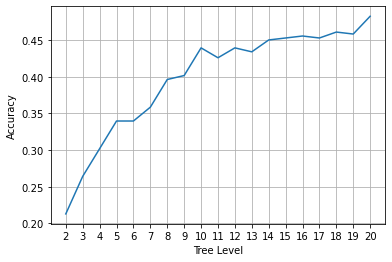

In [37]:

acc = []
for i in range(2, 21):
    tr = DecisionTreeClassifier(random_state=42, max_depth=i)
    tr.fit(X_train, y_train)
    acc.append(accuracy_score(y_test,tr.predict(X_test)))

plt.xticks(range(0,21))
plt.plot(range(2, 21), acc)
plt.ylabel('Accuracy')
plt.xlabel('Tree Level')
plt.grid(True)
plt.show()

### No2. LogisticRegression

In [45]:
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])
LogReg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('clf',
                 OneVsRestClassifier(estimator=LogisticRegression(solver='sag'),
                                     n_jobs=1))])

In [46]:
print("Logistic Regression:")
print('Confusion Matrix')
print(multilabel_confusion_matrix(y_test, LogReg_pipeline.predict(X_test)))
print('')

print("Classification Report")
print(classification_report(y_test, LogReg_pipeline.predict(X_test), target_names=target_names))

Logistic Regression:
Confusion Matrix
[[[255  29]
  [ 72  15]]

 [[281  26]
  [ 59   5]]

 [[305   4]
  [ 23  39]]

 [[322   0]
  [ 35  14]]

 [[308   7]
  [ 26  30]]

 [[317   1]
  [ 23  30]]]

Classification Report
               precision    recall  f1-score   support

       comedy       0.34      0.17      0.23        87
entertainment       0.16      0.08      0.11        64
         food       0.91      0.63      0.74        62
         news       1.00      0.29      0.44        49
         tech       0.81      0.54      0.65        56
   videogames       0.97      0.57      0.71        53

    micro avg       0.67      0.36      0.47       371
    macro avg       0.70      0.38      0.48       371
 weighted avg       0.65      0.36      0.45       371
  samples avg       0.36      0.36      0.36       371



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
y_pred1 = LogReg_pipeline.predict(X_test)

In [48]:
lr_acc = accuracy_score(y_test, y_pred1)
lr_roc = roc_auc_score(y_test, y_pred1, average="weighted", multi_class="ovr")
lr_log = log_loss(y_test, y_pred1)

acc_list.append(lr_acc)
auroc_list.append(lr_roc)
log_list.append(lr_log)

In [112]:
for category in target_names:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, y_train[category])
    # compute the testing accuracy
    prediction = LogReg_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(y_test[category], prediction)))

... Processing comedy
Test accuracy is 0.7277628032345014
... Processing entertainment
Test accuracy is 0.77088948787062
... Processing food
Test accuracy is 0.9272237196765498
... Processing news
Test accuracy is 0.9056603773584906
... Processing tech
Test accuracy is 0.9110512129380054
... Processing videogames
Test accuracy is 0.9353099730458221


### No3. K-Nearest Neighbour

I have to find the best value for K in KNN classification algorithm

Maximum accuracy:- 0.5822102425876011 at K = 6


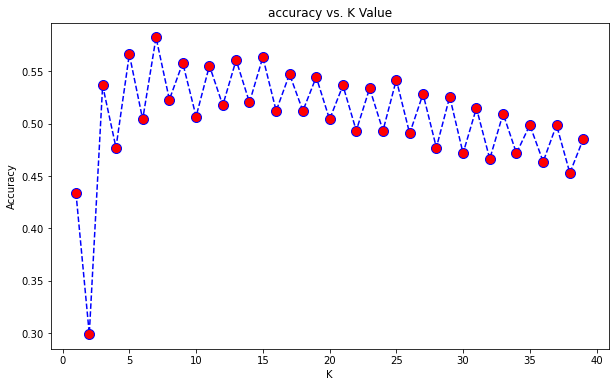

In [49]:
acc = []
# Will take some time
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Since at K=6 it has the best accuracy, K will be 6

In [50]:
k=6
knn_clf=KNeighborsClassifier(n_neighbors = k)
knn_clf.fit(X_train,y_train)
y_pred2 =knn_clf.predict(X_test)

In [51]:
print("KNN Classifier: ")
print('Confusion Matrix')
print(multilabel_confusion_matrix(y_test, y_pred2))
print('')

print("Classification Report:")
print(classification_report(y_test, y_pred2, target_names=target_names))

KNN Classifier: 
Confusion Matrix
[[[278   6]
  [ 67  20]]

 [[303   4]
  [ 52  12]]

 [[304   5]
  [ 11  51]]

 [[322   0]
  [ 30  19]]

 [[309   6]
  [ 21  35]]

 [[314   4]
  [  3  50]]]

Classification Report:
               precision    recall  f1-score   support

       comedy       0.77      0.23      0.35        87
entertainment       0.75      0.19      0.30        64
         food       0.91      0.82      0.86        62
         news       1.00      0.39      0.56        49
         tech       0.85      0.62      0.72        56
   videogames       0.93      0.94      0.93        53

    micro avg       0.88      0.50      0.64       371
    macro avg       0.87      0.53      0.62       371
 weighted avg       0.86      0.50      0.60       371
  samples avg       0.50      0.50      0.50       371



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
knn_acc = accuracy_score(y_test, y_pred2)
knn_roc = roc_auc_score(y_test, y_pred2, average="weighted", multi_class="ovr")
knn_log = log_loss(y_test, y_pred2)

acc_list.append(knn_acc)
auroc_list.append(knn_roc)
log_list.append(knn_log)

In [91]:
for category in target_names:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    knn_clf.fit(X_train, y_train[category])
    # compute the testing accuracy
    prediction = knn_clf.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(y_test[category], prediction)))

... Processing comedy
Test accuracy is 0.8032345013477089
... Processing entertainment
Test accuracy is 0.8490566037735849
... Processing food
Test accuracy is 0.9568733153638814
... Processing news
Test accuracy is 0.9191374663072777
... Processing tech
Test accuracy is 0.9272237196765498
... Processing videogames
Test accuracy is 0.9811320754716981


### No4. Naive Bayes

In [54]:
NB_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])
NB_pipeline.fit(X_train, y_train)

Pipeline(steps=[('clf', OneVsRestClassifier(estimator=MultinomialNB()))])

In [55]:
print("Naive Bayes:")
print('Confusion Matrix')
print(multilabel_confusion_matrix(y_test, NB_pipeline.predict(X_test)))
print('')

print("Classification Report")
print(classification_report(y_test, NB_pipeline.predict(X_test), target_names=target_names))

Naive Bayes:
Confusion Matrix
[[[284   0]
  [ 87   0]]

 [[307   0]
  [ 64   0]]

 [[309   0]
  [ 42  20]]

 [[322   0]
  [ 49   0]]

 [[315   0]
  [ 55   1]]

 [[318   0]
  [ 53   0]]]

Classification Report
               precision    recall  f1-score   support

       comedy       0.00      0.00      0.00        87
entertainment       0.00      0.00      0.00        64
         food       1.00      0.32      0.49        62
         news       0.00      0.00      0.00        49
         tech       1.00      0.02      0.04        56
   videogames       0.00      0.00      0.00        53

    micro avg       1.00      0.06      0.11       371
    macro avg       0.33      0.06      0.09       371
 weighted avg       0.32      0.06      0.09       371
  samples avg       0.06      0.06      0.06       371



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
y_pred3 = NB_pipeline.predict(X_test)

In [57]:
nb_acc = accuracy_score(y_test, y_pred3)
nb_roc = roc_auc_score(y_test, y_pred3, average="weighted", multi_class="ovr")
nb_log = log_loss(y_test, y_pred3)

acc_list.append(nb_acc)
auroc_list.append(nb_roc)
log_list.append(nb_log)

In [115]:
for category in target_names:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    NB_pipeline.fit(X_train, y_train[category])
    # compute the testing accuracy
    prediction = NB_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(y_test[category], prediction)))

... Processing comedy
Test accuracy is 0.7654986522911051
... Processing entertainment
Test accuracy is 0.8274932614555256
... Processing food
Test accuracy is 0.8867924528301887
... Processing news
Test accuracy is 0.8679245283018868
... Processing tech
Test accuracy is 0.8517520215633423
... Processing videogames
Test accuracy is 0.8571428571428571


### No5. LinearSVC

In [59]:
SVC_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])
SVC_pipeline.fit(X_train, y_train)

Pipeline(steps=[('clf', OneVsRestClassifier(estimator=LinearSVC(), n_jobs=1))])

In [60]:
print("LinearSVC:")
print('Confusion Matrix')
print(multilabel_confusion_matrix(y_test, SVC_pipeline.predict(X_test)))
print('')

print("Classification Report")
print(classification_report(y_test, SVC_pipeline.predict(X_test), target_names=target_names))

LinearSVC:
Confusion Matrix
[[[248  36]
  [ 63  24]]

 [[266  41]
  [ 47  17]]

 [[302   7]
  [ 11  51]]

 [[320   2]
  [ 19  30]]

 [[301  14]
  [ 14  42]]

 [[316   2]
  [  9  44]]]

Classification Report
               precision    recall  f1-score   support

       comedy       0.40      0.28      0.33        87
entertainment       0.29      0.27      0.28        64
         food       0.88      0.82      0.85        62
         news       0.94      0.61      0.74        49
         tech       0.75      0.75      0.75        56
   videogames       0.96      0.83      0.89        53

    micro avg       0.67      0.56      0.61       371
    macro avg       0.70      0.59      0.64       371
 weighted avg       0.66      0.56      0.60       371
  samples avg       0.56      0.56      0.56       371



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
y_pred4 = SVC_pipeline.predict(X_test)

In [62]:
svc_acc = accuracy_score(y_test, y_pred4)
svc_roc = roc_auc_score(y_test, y_pred4, average="weighted", multi_class="ovr")
svc_log = log_loss(y_test, y_pred4)

acc_list.append(svc_acc)
auroc_list.append(svc_roc)
log_list.append(svc_log)

In [45]:
for category in target_names:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    SVC_pipeline.fit(X_train, y_train[category])
    # compute the testing accuracy
    prediction = SVC_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(y_test[category], prediction)))

... Processing comedy
Test accuracy is 0.7331536388140162
... Processing entertainment
Test accuracy is 0.7628032345013477
... Processing food
Test accuracy is 0.9514824797843666
... Processing news
Test accuracy is 0.9433962264150944
... Processing tech
Test accuracy is 0.9245283018867925
... Processing videogames
Test accuracy is 0.9703504043126685


### No6. Random Forest

In [64]:
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [65]:
print("Random Forest:")
print('Confusion Matrix')
print(multilabel_confusion_matrix(y_test, rfc.predict(X_test)))
print('')

print("Classification Report")
print(classification_report(y_test, rfc.predict(X_test), target_names=target_names))

Random Forest:
Confusion Matrix
[[[249  35]
  [ 75  12]]

 [[268  39]
  [ 63   1]]

 [[298  11]
  [ 23  39]]

 [[320   2]
  [ 47   2]]

 [[302  13]
  [ 28  28]]

 [[318   0]
  [ 42  11]]]

Classification Report
               precision    recall  f1-score   support

       comedy       0.26      0.14      0.18        87
entertainment       0.03      0.02      0.02        64
         food       0.78      0.63      0.70        62
         news       0.50      0.04      0.08        49
         tech       0.68      0.50      0.58        56
   videogames       1.00      0.21      0.34        53

    micro avg       0.48      0.25      0.33       371
    macro avg       0.54      0.26      0.32       371
 weighted avg       0.51      0.25      0.31       371
  samples avg       0.25      0.25      0.25       371



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
y_pred5 = rfc.predict(X_test)

In [67]:
rfc_acc = accuracy_score(y_test, y_pred5)
rfc_roc = roc_auc_score(y_test, y_pred5, average="weighted", multi_class="ovr")
rfc_log = log_loss(y_test, y_pred5)

acc_list.append(rfc_acc)
auroc_list.append(rfc_roc)
log_list.append(rfc_log)

In [93]:
for category in target_names:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    rfc.fit(X_train, y_train[category])
    # compute the testing accuracy
    prediction = rfc.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(y_test[category], prediction)))

... Processing comedy
Test accuracy is 0.6819407008086253
... Processing entertainment
Test accuracy is 0.7277628032345014
... Processing food
Test accuracy is 0.9245283018867925
... Processing news
Test accuracy is 0.8867924528301887
... Processing tech
Test accuracy is 0.9002695417789758
... Processing videogames
Test accuracy is 0.9056603773584906


## After Using TF-IDF I will now generate vector space model using Term Frequency

In [70]:
transformer2 = FeatureUnion([
                ('transcript_cleaned_count', 
                  Pipeline([('extract_field',
                              FunctionTransformer(lambda x: x['Transcript_Cleaned'], 
                                                  validate=False)),
                            ('count', 
                              CountVectorizer())])),
                ('title_cleaned_count', 
                  Pipeline([('extract_field', 
                              FunctionTransformer(lambda x: x['Title_Cleaned'], 
                                                  validate=False)),
                            ('count', 
                              CountVectorizer())]))]) 

transformer2.fit(df_all)

Transcript_vocab2 = transformer2.transformer_list[0][1].steps[1][1].get_feature_names() 
Title_vocab2 = transformer2.transformer_list[1][1].steps[1][1].get_feature_names()
vocab2 = Transcript_vocab2 + Title_vocab2

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [71]:
count_features = pd.DataFrame(transformer2.transform(df_all).toarray(),index=df_all.index,columns=vocab2)

count_features.head()

,0300am,0600am,07earli,07g,0900pm,0d093,0d09328,0l,0x,10,...,youtub,ytp,zelda,zetajon,zonda,zondai,zone,zoo,zoom,zygon
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
X2 = count_features

In [73]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42, stratify=y)

In [77]:
acc_list2 = []
auroc_list2 =[]
log_list2=[]

### No1. Decision Tree

In [74]:
tr2 = DecisionTreeClassifier(random_state=42)
tr2.fit(X2_train, y2_train)

DecisionTreeClassifier(random_state=42)

In [75]:
print("Decison Tree:")
print('Confusion Matrix')
print(multilabel_confusion_matrix(y2_test, tr2.predict(X2_test)))
print('')

print("Classification Report")
print(classification_report(y2_test, tr2.predict(X2_test), target_names=target_names))

Decison Tree:
Confusion Matrix
[[[231  53]
  [ 67  20]]

 [[258  49]
  [ 51  13]]

 [[290  19]
  [ 15  47]]

 [[309  13]
  [ 22  27]]

 [[288  27]
  [ 19  37]]

 [[306  12]
  [ 18  35]]]

Classification Report
               precision    recall  f1-score   support

       comedy       0.27      0.23      0.25        87
entertainment       0.21      0.20      0.21        64
         food       0.71      0.76      0.73        62
         news       0.68      0.55      0.61        49
         tech       0.58      0.66      0.62        56
   videogames       0.74      0.66      0.70        53

    micro avg       0.51      0.48      0.50       371
    macro avg       0.53      0.51      0.52       371
 weighted avg       0.50      0.48      0.49       371
  samples avg       0.48      0.48      0.48       371



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
y2_pred = tr2.predict(X2_test)
print("Accuracy Score: " + str(accuracy_score(y2_test, y2_pred)))

In [79]:
tr_acc2 = accuracy_score(y2_test, y2_pred)
tr_roc2 = roc_auc_score(y2_test, y2_pred, average="weighted", multi_class="ovr")
tr_log2 = log_loss(y2_test, y2_pred)

acc_list2.append(tr_acc2)
auroc_list2.append(tr_roc2)
log_list2.append(tr_log2)

In [46]:
for category in target_names:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    tr2.fit(X2_train, y2_train[category])
    # compute the testing accuracy
    prediction = tr2.predict(X2_test)
    print('Test accuracy is {}'.format(accuracy_score(y2_test[category], prediction)))

... Processing comedy
Test accuracy is 0.7115902964959568
... Processing entertainment
Test accuracy is 0.7547169811320755
... Processing food
Test accuracy is 0.9164420485175202
... Processing news
Test accuracy is 0.9137466307277629
... Processing tech
Test accuracy is 0.889487870619946
... Processing videogames
Test accuracy is 0.9460916442048517


### No2. LogisticRegression

In [81]:
LogReg_pipeline2 = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])
LogReg_pipeline2.fit(X2_train, y2_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

Pipeline(steps=[('clf',
                 OneVsRestClassifier(estimator=LogisticRegression(solver='sag'),
                                     n_jobs=1))])

In [82]:
print("Logistic Regression:")
print('Confusion Matrix')
print(multilabel_confusion_matrix(y_test, LogReg_pipeline2.predict(X2_test)))
print('')

print("Classification Report")
print(classification_report(y2_test, LogReg_pipeline2.predict(X2_test), target_names=target_names))

Logistic Regression:
Confusion Matrix
[[[273  11]
  [ 63  24]]

 [[296  11]
  [ 52  12]]

 [[303   6]
  [ 11  51]]

 [[321   1]
  [ 31  18]]

 [[307   8]
  [ 17  39]]

 [[315   3]
  [ 12  41]]]

Classification Report
               precision    recall  f1-score   support

       comedy       0.69      0.28      0.39        87
entertainment       0.52      0.19      0.28        64
         food       0.89      0.82      0.86        62
         news       0.95      0.37      0.53        49
         tech       0.83      0.70      0.76        56
   videogames       0.93      0.77      0.85        53

    micro avg       0.82      0.50      0.62       371
    macro avg       0.80      0.52      0.61       371
 weighted avg       0.78      0.50      0.59       371
  samples avg       0.49      0.50      0.49       371



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
y2_pred1 = LogReg_pipeline2.predict(X2_test)

In [84]:
lr_acc2 = accuracy_score(y2_test, y2_pred1)
lr_roc2 = roc_auc_score(y2_test, y2_pred1, average="weighted", multi_class="ovr")
lr_log2 = log_loss(y2_test, y2_pred1)

acc_list2.append(lr_acc2)
auroc_list2.append(lr_roc2)
log_list2.append(lr_log2)

In [50]:
for category in target_names:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline2.fit(X2_train, y2_train[category])
    # compute the testing accuracy
    prediction = LogReg_pipeline2.predict(X2_test)
    print('Test accuracy is {}'.format(accuracy_score(y2_test[category], prediction)))

... Processing comedy


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test accuracy is 0.8032345013477089
... Processing entertainment


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test accuracy is 0.8301886792452831
... Processing food


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test accuracy is 0.954177897574124
... Processing news


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test accuracy is 0.9137466307277629
... Processing tech


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Test accuracy is 0.9326145552560647
... Processing videogames
Test accuracy is 0.9595687331536388


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### No3. K-Nearest Neighbour

Maximum accuracy:- 0.431266846361186 at K = 0


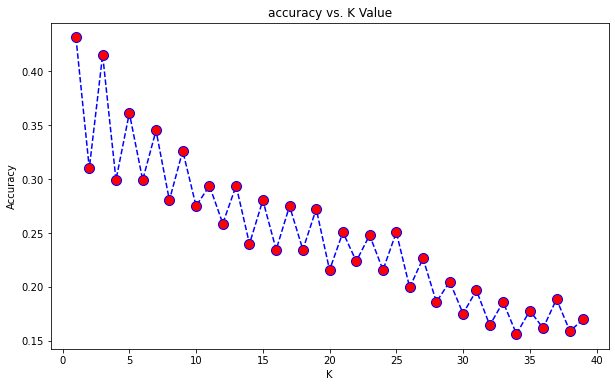

In [85]:
acc = []
# Will take some time
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X2_train,y2_train)
    yhat = neigh.predict(X2_test)
    acc.append(metrics.accuracy_score(y2_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Since K cannot be 0, K will be 2 as it is the next most accurate

In [86]:
k=2
knn_clf2=KNeighborsClassifier(n_neighbors = k)
knn_clf2.fit(X2_train,y2_train)
y2_pred2=knn_clf2.predict(X2_test)

In [87]:
print("KNN Classifier: ")
print('Confusion Matrix')
print(multilabel_confusion_matrix(y2_test, y2_pred2))
print('')

print("Classification Report:")
print(classification_report(y2_test, y2_pred2))

KNN Classifier: 
Confusion Matrix
[[[253  31]
  [ 69  18]]

 [[292  15]
  [ 61   3]]

 [[300   9]
  [ 35  27]]

 [[320   2]
  [ 39  10]]

 [[311   4]
  [ 32  24]]

 [[315   3]
  [ 20  33]]]

Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.21      0.26        87
           1       0.17      0.05      0.07        64
           2       0.75      0.44      0.55        62
           3       0.83      0.20      0.33        49
           4       0.86      0.43      0.57        56
           5       0.92      0.62      0.74        53

   micro avg       0.64      0.31      0.42       371
   macro avg       0.65      0.32      0.42       371
weighted avg       0.61      0.31      0.40       371
 samples avg       0.31      0.31      0.31       371



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
knn_acc2 = accuracy_score(y2_test, y2_pred2)
knn_roc2 = roc_auc_score(y2_test, y2_pred2, average="weighted", multi_class="ovr")
knn_log2 = log_loss(y2_test, y2_pred2)

acc_list2.append(knn_acc2)
auroc_list2.append(knn_roc2)
log_list2.append(knn_log2)

In [57]:
for category in target_names:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    knn_clf2.fit(X2_train, y2_train[category])
    # compute the testing accuracy
    prediction = knn_clf2.predict(X2_test)
    print('Test accuracy is {}'.format(accuracy_score(y2_test[category], prediction)))

... Processing comedy
Test accuracy is 0.7304582210242587
... Processing entertainment
Test accuracy is 0.7951482479784366
... Processing food
Test accuracy is 0.8814016172506739
... Processing news
Test accuracy is 0.889487870619946
... Processing tech
Test accuracy is 0.9029649595687331
... Processing videogames
Test accuracy is 0.9380053908355795


### No4. Naive Bayes

In [89]:
NB_pipeline2 = Pipeline([
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])
NB_pipeline2.fit(X2_train, y2_train)

Pipeline(steps=[('clf', OneVsRestClassifier(estimator=MultinomialNB()))])

In [90]:
print("Naive Bayes:")
print('Confusion Matrix')
print(multilabel_confusion_matrix(y2_test, NB_pipeline2.predict(X2_test)))
print('')

print("Classification Report")
print(classification_report(y2_test, NB_pipeline2.predict(X2_test), target_names=target_names))

Naive Bayes:
Confusion Matrix
[[[224  60]
  [ 32  55]]

 [[233  74]
  [ 14  50]]

 [[287  22]
  [  4  58]]

 [[317   5]
  [ 14  35]]

 [[299  16]
  [  3  53]]

 [[305  13]
  [  2  51]]]

Classification Report
               precision    recall  f1-score   support

       comedy       0.48      0.63      0.54        87
entertainment       0.40      0.78      0.53        64
         food       0.72      0.94      0.82        62
         news       0.88      0.71      0.79        49
         tech       0.77      0.95      0.85        56
   videogames       0.80      0.96      0.87        53

    micro avg       0.61      0.81      0.70       371
    macro avg       0.67      0.83      0.73       371
 weighted avg       0.65      0.81      0.71       371
  samples avg       0.64      0.81      0.70       371



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
y2_pred3 = NB_pipeline2.predict(X2_test)

In [92]:
nb_acc2 = accuracy_score(y2_test, y2_pred3)
nb_roc2 = roc_auc_score(y2_test, y2_pred3, average="weighted", multi_class="ovr")
nb_log2 = log_loss(y2_test, y2_pred3)

acc_list2.append(nb_acc2)
auroc_list2.append(nb_roc2)
log_list2.append(nb_log2)

In [61]:
for category in target_names:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    NB_pipeline2.fit(X2_train, y2_train[category])
    # compute the testing accuracy
    prediction = NB_pipeline2.predict(X2_test)
    print('Test accuracy is {}'.format(accuracy_score(y2_test[category], prediction)))

... Processing comedy
Test accuracy is 0.7520215633423181
... Processing entertainment
Test accuracy is 0.7628032345013477
... Processing food
Test accuracy is 0.9299191374663073
... Processing news
Test accuracy is 0.9487870619946092
... Processing tech
Test accuracy is 0.9487870619946092
... Processing videogames
Test accuracy is 0.9595687331536388


### No5. Random Forest

In [93]:
rfc2 = RandomForestClassifier(random_state = 42)
rfc2.fit(X2_train, y2_train)

RandomForestClassifier(random_state=42)

In [94]:
print("Random Forest:")
print('Confusion Matrix')
print(multilabel_confusion_matrix(y2_test, rfc2.predict(X2_test)))
print('')

print("Classification Report")
print(classification_report(y2_test, rfc2.predict(X2_test), target_names=target_names))

Random Forest:
Confusion Matrix
[[[249  35]
  [ 76  11]]

 [[268  39]
  [ 64   0]]

 [[296  13]
  [ 18  44]]

 [[320   2]
  [ 47   2]]

 [[303  12]
  [ 26  30]]

 [[318   0]
  [ 41  12]]]

Classification Report
               precision    recall  f1-score   support

       comedy       0.24      0.13      0.17        87
entertainment       0.00      0.00      0.00        64
         food       0.77      0.71      0.74        62
         news       0.50      0.04      0.08        49
         tech       0.71      0.54      0.61        56
   videogames       1.00      0.23      0.37        53

    micro avg       0.49      0.27      0.35       371
    macro avg       0.54      0.27      0.33       371
 weighted avg       0.50      0.27      0.32       371
  samples avg       0.27      0.27      0.27       371



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
y2_pred4 = rfc2.predict(X2_test)

In [96]:
rfc_acc2 = accuracy_score(y2_test, y2_pred4)
rfc_roc2 = roc_auc_score(y2_test, y2_pred4, average="weighted", multi_class="ovr")
rfc_log2 = log_loss(y2_test, y2_pred4)

acc_list2.append(rfc_acc2)
auroc_list2.append(rfc_roc2)
log_list2.append(rfc_log2)

In [66]:
for category in target_names:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    rfc2.fit(X2_train, y2_train[category])
    # compute the testing accuracy
    prediction = rfc2.predict(X2_test)
    print('Test accuracy is {}'.format(accuracy_score(y2_test[category], prediction)))

... Processing comedy
Test accuracy is 0.6792452830188679
... Processing entertainment
Test accuracy is 0.7277628032345014
... Processing food
Test accuracy is 0.9083557951482479
... Processing news
Test accuracy is 0.8840970350404312
... Processing tech
Test accuracy is 0.9002695417789758
... Processing videogames
Test accuracy is 0.9245283018867925


## Evaluation
Perform the necessary steps and explain the rationale taken here.



In [68]:
model_list1 = ['Decision Tree', 'Logistic', 'KNN', 'Naive Bayes', 'SVC', 'Random Forest']

In [69]:
tfidf_df = pd.DataFrame(list(zip(model_list1,acc_list, auroc_list, log_list)),
               columns =['Model Name','Accuracy', 'ROC AUC Score', 'Log Loss'])
tfidf_df

,Model Name,Accuracy,ROC AUC Score,Log Loss
0,Decision Tree,0.479784,0.690165,15.496138
1,Logistic,0.355795,0.656984,6.976914
2,KNN,0.504043,0.744733,3.095308
3,Naive Bayes,0.056604,0.528302,1.690339
4,SVC,0.555256,0.747835,9.617641
5,Random Forest,0.250674,0.593430,10.169301


For TF-IDF, LinearSVC has the highest accuracy of 0.555256064690027, second highest is KNN with accuracy of 0.5040431266846361, followed by decision tree, logistic regression, Random Forest and Naive Bayes. Accuracy is not the most accurate measurement as it does not take class imbalance into account hence I did more measurements like ROC AUC Score and Log Loss score which means the lower the better. Based on the table we can see that SVC which has the best accuracy, has a ROC AUC Score as well but a bad log loss. Comparing to the second highest accuracy model which is KNN, KNN has lower ROC AUC score by roughly 0.003 and a way lower log loss. Therefore KNN is a better model than SVC but if we just based it on accuracy we will conclude that SVC is better therefore this is why its important to look at various measurement then make decision on which model is the best. 

For LinearSVC predicting video games has the highest test accuracy and the highest overall confusion matrix, with high true positive rate and low negative rates. For Naive Bayes which has the lowest accuracy, test accuracy for 'Food' category is the highest.

In [97]:
model_list2 = ['Decision Tree', 'Logistic', 'KNN', 'Naive Bayes','Random Forest']

In [98]:
tf_df = pd.DataFrame(list(zip(model_list2,acc_list2, auroc_list2, log_list2)),
               columns =['Model Name','Accuracy', 'ROC AUC Score', 'Log Loss'])
tf_df

,Model Name,Accuracy,ROC AUC Score,Log Loss
0,Decision Tree,0.482480,0.688623,16.197444
1,Logistic,0.479784,0.737276,3.824180
2,KNN,0.309973,0.633498,6.885443
3,Naive Bayes,0.485175,0.847718,5.081471
4,Random Forest,0.266846,0.601215,10.228591


For Term Frequency, Naive Bayes has the highest accuracy of 0.48517520215633425, next is decision tree with accuracy of 0.48247978436657685, followed by logistic regression, KNN, and lastly Random Forest. Decision Tree has a very high log loss therefore 3rd best accuracy is logistic regression. In all 3 column Naive Bayes and Logistic Regression has quite a close measurement but Naive Bayes has better measurement in 2/3 column compared to logistic regression, hence Naive Bayes is the best model for using Term Frequency.

For the highest accuracy classifer, Naive Bayes has the highest test accuracy for videogames which is same as LinearSVC at TF-IDF. For the worst accuracy which is random forest, videogames has the highest test accuracy as well.

Using TF-IDF overall gives better result compared to Term Frequency. 